# Effect of PCA on the classification of the "Buy computer" dataset using Decision Tree

## Without PCA

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from dataset import dataset

buy_comp = np.load('buy_comp.npy', allow_pickle = True).item()

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


### Printing details of the dataset

In [2]:
print('Features: ', buy_comp.data[:5])
print('Feature names: ', buy_comp.feature_names)
print('Feature shape:', buy_comp.data.shape)
print('Target: ', buy_comp.target[:5])
print('Target names:', buy_comp.target_names)
print('Target shape:', buy_comp.target.shape)

Features:  [[0 2 0 0]
 [0 2 0 1]
 [1 2 0 0]
 [2 1 0 0]
 [2 0 1 0]]
Feature names:  ['age' 'income' 'student' 'credit rating']
Feature shape: (14, 4)
Target:  [0 0 1 1 1]
Target names: ['N' 'Y']
Target shape: (14,)


### Create dataframe using the data

In [3]:
X=buy_comp.data
y=buy_comp.target
df_buy_comp = pd.DataFrame(np.c_[buy_comp.data, buy_comp.target], columns = np.append(buy_comp.feature_names, ['target']))
df_buy_comp.head(10)

,age,income,student,credit rating,target
0,0,2,0,0,0
1,0,2,0,1,0
2,1,2,0,0,1
3,2,1,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,1,0,1,1,1
7,0,1,0,0,0
8,0,0,1,0,1
9,2,1,1,0,1


### Split dataset into train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10, 4) (4, 4) (10,) (4,)


### Create and train Decision Tree

In [15]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [16]:
y_predict = tree.predict(X_test)
y_predict

array([1, 0, 0, 1])

### Print the evaluation metrics of the decision tree

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [18]:
print('Accuracy is',accuracy_score(y_predict,y_test))

Accuracy is 0.75


## Using PCA

### Create PCA object and fit it on the dataset's features

In [19]:
def autolabel(rects): # Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height, '%f' % float(height), ha='center', va='bottom')

[51.91238366 27.06875431 13.71163164  7.30723039]


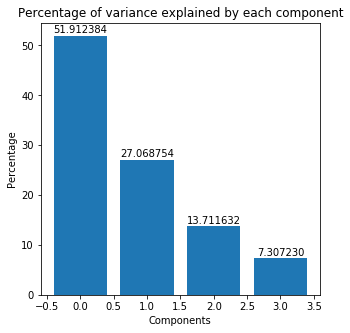

In [20]:
pca = PCA()
pca.fit(X)
pca_vars = pca.explained_variance_ratio_ * 100
print(pca_vars)
fig, ax = plt.subplots(figsize = (5, 5))
bar = plt.bar(np.arange(len(pca_vars)), pca_vars)
autolabel(bar)
plt.title('Percentage of variance explained by each component')
plt.xlabel('Components')
plt.ylabel('Percentage')
plt.show()

Since the 1st, 2nd and the 3rd Principle Components explain more than 90% variance, we need to keep the first three PCs.

### Transform the feature space using PCA and take just the first component

In [21]:
X_pca = pca.transform(X)[:, 0:3]
print(X_pca.shape)

(14, 3)


### Split the data into train and test sets

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size = 0.25, random_state = 5)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(10, 3) (4, 3) (10,) (4,)


### Create decision tree and fit it on the new transformed data

In [24]:
tree2 = DecisionTreeClassifier(random_state=123)
tree2.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [25]:
y_predict = tree2.predict(X_test2)
y_predict

array([1, 0, 1, 1])

### Print the evaluation parameters of the model

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [27]:
print('Accuracy is',accuracy_score(y_predict,y_test))

Accuracy is 0.5


## Conclusion

Since we lose some information when we neglect a few components, the accuracy drops.